In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
import os,sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import interp
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def get_data(x_path, y_path):
    x = np.load(x_path)
    y = np.load(y_path)
    y = y.astype(np.float)
    return x, y

In [3]:
x_train, y_train = get_data("NEPDF_data_train/Nxdata_tf0.npy", "NEPDF_data_train/ydata_tf0.npy")
x_test, y_test = get_data("NEPDF_data_test/Nxdata_tf0.npy", "NEPDF_data_test/ydata_tf0.npy")
print(x_train.shape, 'x_train samples')
print(x_test.shape, 'x_test samples')

(882, 32, 32, 1) x_train samples
(420, 32, 32, 1) x_test samples


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


In [5]:
new_model = Sequential()
for layer in model.layers[:-2]:
    #layer.trainable = False                       # freeze param or not
    new_model.add(layer)

new_model.add(Dense(1))
new_model.add(Activation("sigmoid"))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
new_model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
early_stop = EarlyStopping(monitor="val_accuracy", patience=150, verbose=0, mode="auto")
checkpoint = ModelCheckpoint(filepath="", monitor="val_accuracy", verbose=1, save_best_only=True, mode="auto", period=1)
history = new_model.fit(x=x_train, y=y_train, batch_size=32, epochs=200, validation_split=0.2, shuffle=True)#, callbacks=[checkpoint, early_stop])

Epoch 1/200
23/23 [==============================] - 2s 96ms/step - loss: 0.6922 - accuracy: 0.5333 - val_loss: 0.6917 - val_accuracy: 0.4859
Epoch 2/200
23/23 [==============================] - 2s 85ms/step - loss: 0.6897 - accuracy: 0.5035 - val_loss: 0.6893 - val_accuracy: 0.5141
Epoch 3/200
23/23 [==============================] - 2s 90ms/step - loss: 0.6853 - accuracy: 0.6014 - val_loss: 0.6835 - val_accuracy: 0.6384
Epoch 4/200
23/23 [==============================] - 2s 83ms/step - loss: 0.6738 - accuracy: 0.6369 - val_loss: 0.6760 - val_accuracy: 0.5085
Epoch 5/200
23/23 [==============================] - 2s 84ms/step - loss: 0.6439 - accuracy: 0.6184 - val_loss: 0.6513 - val_accuracy: 0.6328
Epoch 6/200
23/23 [==============================] - 2s 84ms/step - loss: 0.6139 - accuracy: 0.6780 - val_loss: 0.8225 - val_accuracy: 0.5028
Epoch 7/200
23/23 [==============================] - 2s 91ms/step - loss: 0.6091 - accuracy: 0.6582 - val_loss: 0.7015 - val_accuracy: 0.5424
Epoch 

23/23 [==============================] - 2s 89ms/step - loss: 0.4178 - accuracy: 0.7844 - val_loss: 0.4286 - val_accuracy: 0.8023
Epoch 58/200
23/23 [==============================] - 2s 89ms/step - loss: 0.3968 - accuracy: 0.7872 - val_loss: 0.4297 - val_accuracy: 0.7797
Epoch 59/200
23/23 [==============================] - 2s 89ms/step - loss: 0.3906 - accuracy: 0.7901 - val_loss: 0.4443 - val_accuracy: 0.7966
Epoch 60/200
23/23 [==============================] - 2s 90ms/step - loss: 0.3935 - accuracy: 0.7830 - val_loss: 0.4551 - val_accuracy: 0.7684
Epoch 61/200
23/23 [==============================] - 2s 89ms/step - loss: 0.3840 - accuracy: 0.7858 - val_loss: 0.5072 - val_accuracy: 0.7401
Epoch 62/200
23/23 [==============================] - 2s 87ms/step - loss: 0.4359 - accuracy: 0.7716 - val_loss: 0.4567 - val_accuracy: 0.7684
Epoch 63/200
23/23 [==============================] - 2s 88ms/step - loss: 0.4449 - accuracy: 0.7560 - val_loss: 0.4861 - val_accuracy: 0.7401
Epoch 64/200

23/23 [==============================] - 2s 88ms/step - loss: 0.3662 - accuracy: 0.8184 - val_loss: 0.4217 - val_accuracy: 0.7910
Epoch 115/200
23/23 [==============================] - 2s 88ms/step - loss: 0.3570 - accuracy: 0.8284 - val_loss: 0.4171 - val_accuracy: 0.7910
Epoch 116/200
23/23 [==============================] - 2s 88ms/step - loss: 0.3390 - accuracy: 0.8355 - val_loss: 0.4211 - val_accuracy: 0.8249
Epoch 117/200
23/23 [==============================] - 2s 95ms/step - loss: 0.3458 - accuracy: 0.8241 - val_loss: 0.3896 - val_accuracy: 0.8418
Epoch 118/200
23/23 [==============================] - 2s 90ms/step - loss: 0.3259 - accuracy: 0.8440 - val_loss: 0.4971 - val_accuracy: 0.7571
Epoch 119/200
23/23 [==============================] - 2s 91ms/step - loss: 0.4633 - accuracy: 0.7631 - val_loss: 0.4647 - val_accuracy: 0.7401
Epoch 120/200
23/23 [==============================] - 2s 90ms/step - loss: 0.3928 - accuracy: 0.7972 - val_loss: 0.4609 - val_accuracy: 0.7458
Epoch 

Epoch 171/200
23/23 [==============================] - 2s 98ms/step - loss: 0.2056 - accuracy: 0.9220 - val_loss: 0.3056 - val_accuracy: 0.8814
Epoch 172/200
23/23 [==============================] - 2s 90ms/step - loss: 0.2562 - accuracy: 0.8922 - val_loss: 0.2558 - val_accuracy: 0.9153
Epoch 173/200
23/23 [==============================] - 2s 90ms/step - loss: 0.2187 - accuracy: 0.9121 - val_loss: 1.0206 - val_accuracy: 0.7232
Epoch 174/200
23/23 [==============================] - 2s 92ms/step - loss: 0.5425 - accuracy: 0.7603 - val_loss: 0.4413 - val_accuracy: 0.7571
Epoch 175/200
23/23 [==============================] - 2s 96ms/step - loss: 0.3825 - accuracy: 0.8227 - val_loss: 0.4315 - val_accuracy: 0.7740
Epoch 176/200
23/23 [==============================] - 2s 94ms/step - loss: 0.3581 - accuracy: 0.8199 - val_loss: 0.4034 - val_accuracy: 0.7966
Epoch 177/200
23/23 [==============================] - 2s 90ms/step - loss: 0.3211 - accuracy: 0.8553 - val_loss: 0.4002 - val_accuracy:

In [8]:
print(history.history["val_accuracy"])

[0.4858756959438324, 0.5141242742538452, 0.6384180784225464, 0.508474588394165, 0.6327683329582214, 0.5028248429298401, 0.5423728823661804, 0.5819209218025208, 0.6440678238868713, 0.6158192157745361, 0.5649717450141907, 0.7344632744789124, 0.5762711763381958, 0.7062146663665771, 0.6836158037185669, 0.694915235042572, 0.604519784450531, 0.7288135886192322, 0.7514124512672424, 0.7231638431549072, 0.7344632744789124, 0.5875706076622009, 0.7401130199432373, 0.7514124512672424, 0.7457627058029175, 0.7401130199432373, 0.6271186470985413, 0.7457627058029175, 0.7514124512672424, 0.7401130199432373, 0.7175140976905823, 0.7457627058029175, 0.7514124512672424, 0.7401130199432373, 0.7457627058029175, 0.6723163723945618, 0.7231638431549072, 0.7344632744789124, 0.7401130199432373, 0.6440678238868713, 0.7118644118309021, 0.7457627058029175, 0.7175140976905823, 0.604519784450531, 0.7514124512672424, 0.7514124512672424, 0.7344632744789124, 0.7457627058029175, 0.7570621371269226, 0.7570621371269226, 0.7

In [9]:
new_model.save("train_model/tuned.hdf5")

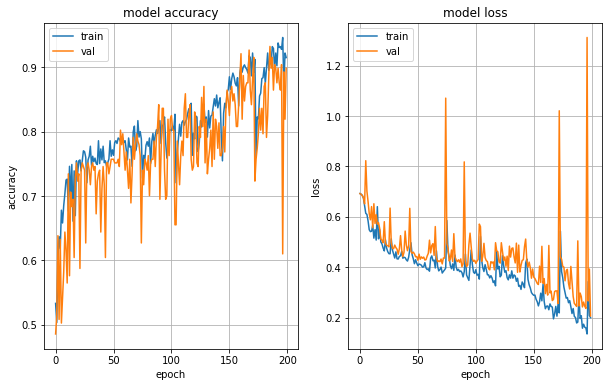

In [10]:
save_dir="train_model"
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'val'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.savefig(save_dir+'/tuned_result.pdf')

In [11]:
model_path="train_model/tuned.hdf5"
new_model.load_weights(model_path)
y_predict=new_model.predict(x_test)

In [12]:
y_test.shape

(420,)

In [13]:
r=0
for i in range(y_predict.shape[0]):
    if y_predict[i]>0.5:
        y_predict[i]=1
    else:
        y_predict[i]=0
    if (y_predict[i]==y_test[i]):
        r=r+1
print (r/y_test.shape[0])      

0.7880952380952381


In [14]:
# performance visualization
def performance_visualization(labels, scores):
    p = Performance(labels, scores)
    print("confusion matrix")
    print(p.get_confusion_matrix())
    acc = p.accuracy()
    pre = p.precision()
    rec = p.recall()
    print('accuracy: %.2f' % acc)
    print('precision: %.2f' % pre)
    print('recall: %.2f' % rec)
    p.roc_plot()

# for classifier's performance evaluation
class Performance:

    def __init__(self, labels, scores, threshold=0.5):
        # true value of y
        self.labels = labels
        # predicted value of y
        self.scores = scores
        # classification threshold
        self.threshold = threshold
        self.db = self.get_db()
        self.TP, self.FP, self.FN, self.TN = self.get_confusion_matrix()

    def accuracy(self):
        return (self.TP + self.TN) / (self.TP + self.FN + self.FP + self.TN)

    def precision(self):
        return self.TP / (self.TP + self.FP)

    def recall(self):
        return self.TP / (self.TP + self.FN)

    def auc(self):
        auc = 0.
        prev_x = 0
        xy_arr = self.roc_coord()
        for x, y in xy_arr:
            if x != prev_x:
                auc += (x - prev_x) * y
                prev_x = x
        return auc

    # return coordinate of roc
    def roc_coord(self):
        xy_arr = []
        tp, fp = 0., 0.
        neg = self.TN + self.FP
        pos = self.TP + self.FN
        for i in range(len(self.db)):
            tp += self.db[i][0]
            fp += 1 - self.db[i][0]
            xy_arr.append([fp / neg, tp / pos])
        return xy_arr

    # plot roc
    def roc_plot(self):
        auc = self.auc()
        xy_arr = self.roc_coord()
        x = [_v[0] for _v in xy_arr]
        y = [_v[1] for _v in xy_arr]
        plt.title("ROC curve (AUC = %.4f)" % auc)
        plt.ylabel("True Positive Rate")
        plt.xlabel("False Positive Rate")
        plt.plot(x, y)
        plt.grid()
        plt.savefig("train_model/ROC.pdf")
        plt.show()

    def get_db(self):
        db = []
        for i in range(len(self.labels)):
            db.append([self.labels[i], self.scores[i]])
        db = sorted(db, key=lambda x: x[1], reverse=True)
        return db

    # calculate confusion matrix
    def get_confusion_matrix(self):
        tp, fp, fn, tn = 0., 0., 0., 0.
        for i in range(len(self.labels)):
            if self.labels[i] == 1 and self.scores[i] >= self.threshold:
                tp += 1
            elif self.labels[i] == 0 and self.scores[i] >= self.threshold:
                fp += 1
            elif self.labels[i] == 1 and self.scores[i] < self.threshold:
                fn += 1
            else:
                tn += 1
        return [tp, fp, fn, tn]

confusion matrix
[179.0, 58.0, 31.0, 152.0]
accuracy: 0.79
precision: 0.76
recall: 0.85


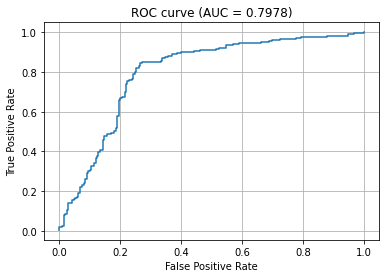

In [15]:
labels = y_test
scores = y_predict
performance_visualization(labels, scores)